## OnePort Data Analysis  


### Questions:
        1. What continent had the highest average freight rate ex Africa in 2020?
        2. What were the top 3 destinations with the highest freight rate for the last quarter of 2020? How does it compare to the second quarter of the same year?
        3. Which shipping line has the highest Intra African rate? Would you recommend it to a potential shipper considering its transit time?
        4. Which route experienced the biggest freight rate increase within the timeframe of the analysis?
        5. What are the main differences in freight rate patterns across the different shipping lines?

### Steps taking to analyze the data and answer the question

1. Import the necessary libraries and data
2. Check the empty(NAN) rows and fill/drop
3. Clean the data
4. Analyze and answer the question
5. Visualize if needed

## Import the necessary libraries

In [15]:
import pandas as pd
import numpy as np

df =  pd.read_csv('./Downloads/freight_db.csv')
df.head(10)

,DATE,VALID TILL,ORIGIN CONTINENT,POL,POL COUNTRY,POL REGION,POD,POD COUNTRY,POD CONTINENT,SHIPPING LINES,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS)
0,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,676.76,1126.80,NaN
1,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Hapag Lloyd,733.44,1126.80,NaN
2,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Hapag Lloyd,700.00,1142.00,NaN
3,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Maersk,991.00,1502.02,NaN
4,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Maersk,517.00,807.00,NaN
5,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,Maersk,364.00,730.00,NaN
6,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Qingdao,China,ASIA,Maersk,174.00,373.00,NaN
7,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Maersk,398.00,319.00,NaN
8,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,CMA CGM,700.00,1200.00,NaN
9,04/07/2020,24/04/2020,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,589.97,962.23,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                2536 non-null   object
 1   VALID TILL          2536 non-null   object
 2   ORIGIN CONTINENT    2536 non-null   object
 3   POL                 2536 non-null   object
 4   POL COUNTRY         2536 non-null   object
 5   POL REGION          2536 non-null   object
 6   POD                 2536 non-null   object
 7   POD COUNTRY         2536 non-null   object
 8   POD CONTINENT       2536 non-null   object
 9   SHIPPING LINES      2536 non-null   object
 10  20FT RATE (USD)     2058 non-null   object
 11  40FT RATE (USD)     2053 non-null   object
 12  TRANSIT TIME(DAYS)  1586 non-null   object
dtypes: object(13)
memory usage: 257.7+ KB


## Fill the empty(nan) rows with mean

I would have drop (delete) the rows with nan but looking at the information above, the rows with nan are numbers which will be calculated and putting mean is better than deleting close to half of the entire data.

In [23]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                2522 non-null   object
 1   VALID TILL          2522 non-null   object
 2   ORIGIN CONTINENT    2522 non-null   object
 3   POL                 2522 non-null   object
 4   POL COUNTRY         2522 non-null   object
 5   POL REGION          2522 non-null   object
 6   POD                 2522 non-null   object
 7   POD COUNTRY         2522 non-null   object
 8   POD CONTINENT       2522 non-null   object
 9   SHIPPING LINES      2522 non-null   object
 10  20FT RATE (USD)     2522 non-null   object
 11  40FT RATE (USD)     2522 non-null   object
 12  TRANSIT TIME(DAYS)  2522 non-null   object
dtypes: object(13)
memory usage: 275.8+ KB


## Cleaning the data

They are dirty data in the rates and i have to take them to be able to analyse the dataframe


In [24]:
row_drop = df['20FT RATE (USD)'].isin (['SEPT' , '183/363' , '-'])
df = df[~row_drop]

The month of june is 30 days so i have to take out the wrong date data and convert the rest to date and numbers datatype respectively before working on it 

In [25]:
df.head()

,DATE,VALID TILL,ORIGIN CONTINENT,POL,POL COUNTRY,POL REGION,POD,POD COUNTRY,POD CONTINENT,SHIPPING LINES,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS)
0,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,676.76,1126.80,0
1,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Hapag Lloyd,733.44,1126.80,0
2,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Hapag Lloyd,700.00,1142.00,0
3,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Maersk,991.00,1502.02,0
4,23/03/2020,04/06/2020,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Maersk,517.00,807.00,0


In [26]:
df = df.loc[df['VALID TILL'] != '31/06/2020']
df['VALID TILL'] = pd.to_datetime(df['VALID TILL'])
df['DATE'] = pd.to_datetime(df['DATE'])

df['TRANSIT TIME(DAYS)'] = pd.to_numeric(df['TRANSIT TIME(DAYS)'])
df['20FT RATE (USD)'] = pd.to_numeric(df['20FT RATE (USD)'])
df['40FT RATE (USD)'] = pd.to_numeric(df['40FT RATE (USD)'])
df.head(10)

,DATE,VALID TILL,ORIGIN CONTINENT,POL,POL COUNTRY,POL REGION,POD,POD COUNTRY,POD CONTINENT,SHIPPING LINES,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS)
0,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,676.76,1126.80,0
1,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Hapag Lloyd,733.44,1126.80,0
2,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Hapag Lloyd,700.00,1142.00,0
3,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Maersk,991.00,1502.02,0
4,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,Maersk,517.00,807.00,0
5,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,Maersk,364.00,730.00,0
6,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Qingdao,China,ASIA,Maersk,174.00,373.00,0
7,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Ho Chi Minh,Vietnam,ASIA,Maersk,398.00,319.00,0
8,2020-03-23,2020-04-06,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,CMA CGM,700.00,1200.00,0
9,2020-04-07,2020-04-24,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,Hapag Lloyd,589.97,962.23,0


### Create a new column called Average_Rate by adding the 2 rate cols and divide by count(2)

In [27]:
df['AVG_RATE'] = (df['20FT RATE (USD)'] + df['40FT RATE (USD)'])/2

### Question 1 Answer

Aside Africa, the continent with the highest average rate in 2020 is Europe

Note: The entire dataset is 2020

In [28]:
df.groupby('POD CONTINENT').mean()

,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS),AVG_RATE
POD CONTINENT,,,,
AFRICA,897.168559,1426.026107,23.133205,1161.597333
ASIA,409.830261,591.623270,21.633043,500.726765
EUROPE,562.975780,885.317634,16.723118,724.146707


### Group the dataset into quarters of the year to answer question 2

In [29]:
last_quarter = df['VALID TILL'].between('2020-10-1' , '2020-12-30' ) 
third_quarter = df['VALID TILL'].between('2020-7-1', '2020-9-30')
second_quarter = df['VALID TILL'].between('2020-4-1', '2020-6-30' )
first_quarter = df['VALID TILL'].between('2020-1-1', '2020-3-30' )

df[last_quarter].head()

,DATE,VALID TILL,ORIGIN CONTINENT,POL,POL COUNTRY,POL REGION,POD,POD COUNTRY,POD CONTINENT,SHIPPING LINES,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS),AVG_RATE
1231,2020-01-10,2020-10-31,AFRICA,Apapa,Nigeria,West Africa,Tilbury,United Kingdom,AFRICA,MAERSK,277.0,874.0,69,575.5
1232,2020-01-10,2020-10-31,AFRICA,Apapa,Nigeria,West Africa,Rotterdam,Netherland,EUROPE,MAERSK,277.0,567.0,72,422.0
1233,2020-01-10,2020-10-31,AFRICA,Apapa,Nigeria,West Africa,Hamburg,Germany,EUROPE,MAERSK,477.0,647.0,76,562.0
1234,2020-01-10,2020-10-31,AFRICA,Apapa,Nigeria,West Africa,Mundra,India,ASIA,MAERSK,329.0,695.0,51,512.0
1235,2020-01-10,2020-10-31,AFRICA,Apapa,Nigeria,West Africa,Ho chi minh,Vietnam,ASIA,MAERSK,393.0,314.0,42,353.5


### Question 2 Answer

The top 3 destinations with the highest freight rate for the last quarter of 2020 are Liberia, Kenya and Nigeria
While in second quarter these countries were not the one with the top heighest freight rate and among all india and china have maintain the lowest rate within this two quarters.

In [30]:
q4 = df[last_quarter].groupby('POD COUNTRY').sum().sort_values('AVG_RATE', ascending = False)
q4

,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS),AVG_RATE
POD COUNTRY,,,,
Liberia,60523.08,100346.14,1420,80434.61
Kenya,57299.32,95639.12,1752,76469.22
Nigeria,62086.58,90275.56,1736,76181.07
Togo,46146.72,75085.08,1242,60615.90
Cameroon,45314.44,75597.66,1316,60456.05
Ivory coast,45935.86,73272.26,1454,59604.06
South Africa,42146.56,76175.60,1576,59161.08
Ghana,44438.02,67836.78,1466,56137.40
Egypt,38906.56,60401.98,1140,49654.27


In [31]:
df[second_quarter].groupby('POD COUNTRY').sum().sort_values('AVG_RATE', ascending = False)

,20FT RATE (USD),40FT RATE (USD),TRANSIT TIME(DAYS),AVG_RATE
POD COUNTRY,,,,
Ghana,25195.00,38594.00,0,31894.500
South Africa,20181.00,35934.00,0,28057.500
Germany,21176.24,29632.51,0,25404.375
Netherland,19913.51,29816.23,0,24864.870
Kenya,17780.00,29137.00,0,23458.500
Togo,17917.00,28816.00,0,23366.500
Nigeria,18046.00,28636.00,0,23341.000
Egypt,15799.65,20248.58,0,18024.115
Vietnam,14676.00,18813.00,0,16744.500


<AxesSubplot:xlabel='POD COUNTRY'>

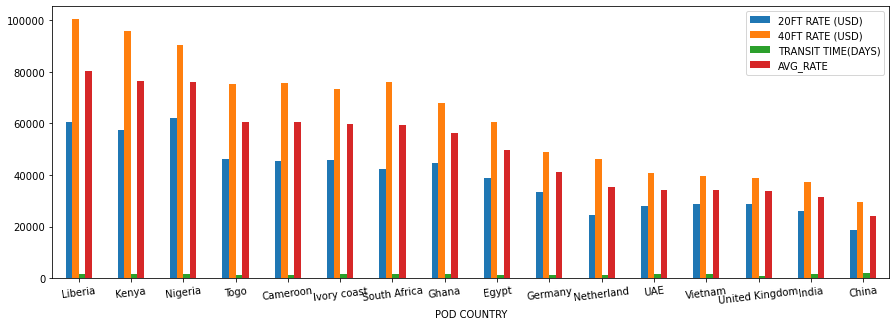

In [32]:
q4.plot.bar(rot=7,figsize = (15,5))

### Question 3 Answer

Cma cgm shipping line has the highest Intra African rate. Hapag lloyd has the fastest transit time, i can't recommend cma cgm to potential shipper due to her high rate and low transit time. 
I will recommend Hapag lloyd.

Note: The missing data that i fill with 0 can't allow us know the accurate situation

In [33]:
df['SHIPPING LINES'] = df['SHIPPING LINES'].str.capitalize()
df.groupby(['POD CONTINENT', 'SHIPPING LINES']).sum()

20FT RATE (USD)  40FT RATE (USD)  \
POD CONTINENT SHIPPING LINES                                     
AFRICA        Cma cgm               649116.71       1097226.35   
              Hapag lloyd           154818.35        226559.78   
              Maersk                590264.88        892258.44   
ASIA          Cma cgm               109067.40        174064.38   
              Hapag lloyd            35384.00         49055.00   
              Maersk                 91201.00        117064.00   
EUROPE        Cma cgm                88904.45        144189.54   
              Hapag lloyd            42032.95         61987.88   
              Maersk                 78489.59        123160.74   

                              TRANSIT TIME(DAYS)    AVG_RATE  
POD CONTINENT SHIPPING LINES                                  
AFRICA        Cma cgm                      14919  873171.530  
              Hapag lloyd                   4720  190689.065  
              Maersk                       16310  741261.660  
ASIA          Cma cgm                       4591  141565.890  
              Hapag lloyd                   2434   42219.500  
              Maersk                        5414  104132.500  
EUROPE        Cma cgm                       2119  116546.995  
              Hapag lloyd                   1207   52010.415  
              Maersk                        2895  100825.165

In [34]:
tripz_count = df.groupby(['POD CONTINENT', 'SHIPPING LINES']).count() 
tripz_count

DATE  VALID TILL  ORIGIN CONTINENT  POL  \
POD CONTINENT SHIPPING LINES                                            
AFRICA        Cma cgm          535         535               535  535   
              Hapag lloyd      476         476               476  476   
              Maersk           543         543               543  543   
ASIA          Cma cgm          200         200               200  200   
              Hapag lloyd      173         173               173  173   
              Maersk           202         202               202  202   
EUROPE        Cma cgm          120         120               120  120   
              Hapag lloyd      120         120               120  120   
              Maersk           132         132               132  132   

                              POL COUNTRY  POL REGION  POD  POD COUNTRY  \
POD CONTINENT SHIPPING LINES                                              
AFRICA        Cma cgm                 535         535  535          535   
              Hapag lloyd             476         476  476          476   
              Maersk                  543         543  543          543   
ASIA          Cma cgm                 200         200  200          200   
              Hapag lloyd             173         173  173          173   
              Maersk                  202         202  202          202   
EUROPE        Cma cgm                 120         120  120          120   
              Hapag lloyd             120         120  120          120   
              Maersk                  132         132  132          132   

                              20FT RATE (USD)  40FT RATE (USD)  \
POD CONTINENT SHIPPING LINES                                     
AFRICA        Cma cgm                     535              535   
              Hapag lloyd                 476              476   
              Maersk                      543              543   
ASIA          Cma cgm                     200              200   
              Hapag lloyd                 173              173   
              Maersk                      202              202   
EUROPE        Cma cgm                     120              120   
              Hapag lloyd                 120              120   
              Maersk                      132              132   

                              TRANSIT TIME(DAYS)  AVG_RATE  
POD CONTINENT SHIPPING LINES                                
AFRICA        Cma cgm                        535       535  
              Hapag lloyd                    476       476  
              Maersk                         543       543  
ASIA          Cma cgm                        200       200  
              Hapag lloyd                    173       173  
              Maersk                         202       202  
EUROPE        Cma cgm                        120       120  
              Hapag lloyd                    120       120  
              Maersk                         132       132

In [179]:
 14919/535
4720/476
16310/543

30.03683241252302

### Question 4 Answer

Cma cgm is still the route that experience the biggest increase in this analysis

In [35]:
df.groupby('SHIPPING LINES').describe()

20FT RATE (USD)                                                \
                         count        mean         std    min    25%     50%   
SHIPPING LINES                                                                 
Cma cgm                  855.0  990.746854  473.412566    0.0  700.0  971.54   
Hapag lloyd              769.0  301.996489  379.851537 -141.0    0.0    0.00   
Maersk                   877.0  866.539875  639.090770 -289.0  404.0  686.00   

                                40FT RATE (USD)               ...  \
                    75%     max           count         mean  ...   
SHIPPING LINES                                                ...   
Cma cgm         1326.30  2635.0           855.0  1655.532480  ...   
Hapag lloyd      613.22  1900.0           769.0   439.015163  ...   
Maersk          1210.00  3410.0           877.0  1291.314914  ...   

               TRANSIT TIME(DAYS)       AVG_RATE                           \
                              75%   max    count         mean         std   
SHIPPING LINES                                                              
Cma cgm                      38.5  67.0    855.0  1323.139667  650.363662   
Hapag lloyd                  20.0  85.0    769.0   370.505826  463.752832   
Maersk                       42.0  98.0    877.0  1078.927395  781.467627   

                                                         
                  min    25%       50%      75%     max  
SHIPPING LINES                                           
Cma cgm           0.0  850.0  1368.445  1800.00  3752.5  
Hapag lloyd    -279.0    0.0     0.000   738.35  1827.5  
Maersk         -366.0  527.0   854.000  1570.00  4625.0  

[3 rows x 32 columns]

SHIPPING LINES
Cma cgm        AxesSubplot(0.125,0.125;0.775x0.755)
Hapag lloyd    AxesSubplot(0.125,0.125;0.775x0.755)
Maersk         AxesSubplot(0.125,0.125;0.775x0.755)
Name: AVG_RATE, dtype: object

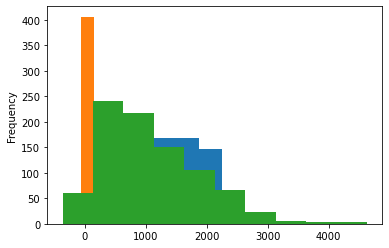

In [44]:
df.groupby('SHIPPING LINES').AVG_RATE.plot(kind ='hist')

### Question 5 Answer

I don't have much information to draw an insight on the pattern but i can see 2x increase in  the freght rate over year.

In [181]:
## I downloaded the cleaned data to create a dashboard on data studio


df.to_csv('./Downloads/cleaned_data.csv')

## My Observation and conclusion

Part of the properties of data used in analysis is being accurate, seeing from the dataframe having unrelated data in some columns and wrong categorization like United Kingdom being called Africa continent in the POD CONTINENT column puts some doubts in the accuracy of our data.

The dashboard link below https://datastudio.google.com/reporting/e1a018ed-eb25-4721-a01d-df6153fd9cbf